In [28]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [3]:
with open('/home/aka/Documents/DataWrangling/df_features_train.pickle', 'rb') as f:
    df_train = pickle.load(f)

df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_083-036-127,1,-215.735214,203.520248,-24.573511,-13.739591,12.981566,13.971969,4.032739,1.523654,5.437962,...,0.027852,0.148277,0.013933,0.020755,0.350970,0.008265,0.007015,0.076367,0.200041,0
bass_synthetic_035-031-025,0,-401.960266,66.963104,52.627304,40.268837,28.114470,19.916792,14.606725,11.273973,8.552884,...,0.000000,0.023124,0.045701,0.123211,0.964425,0.078941,0.006567,0.002147,0.000000,0
bass_synthetic_075-090-050,1,-681.080322,5.502732,0.478403,0.824968,2.747365,3.543370,1.626568,-0.638081,-0.192059,...,0.131774,0.155086,0.148135,0.191533,0.207755,0.213146,0.163551,0.077254,0.156310,0
bass_synthetic_028-024-050,0,-432.107208,143.968430,91.772957,40.883369,13.048125,7.531934,9.935453,9.098906,4.396384,...,0.035636,0.086192,0.000000,0.000000,0.280554,0.000000,0.003094,0.006244,0.076018,0
bass_electronic_019-039-075,0,-458.583588,155.394806,89.419495,48.771755,24.855350,1.584153,-15.029453,-15.952425,-6.990792,...,0.695661,0.102126,0.048201,0.030898,0.183257,0.033676,0.059994,0.481457,0.046375,0


In [4]:
df_train.shape

(50000, 167)

In [5]:
with open('/home/aka/Documents/DataWrangling/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865784,46.664146,34.379799,24.787592,17.420424,10.198802,4.609534,1.380598,-1.023342,...,0.034056,0.035498,0.025267,0.019353,0.038954,0.092328,0.087519,0.061090,0.091117,0
keyboard_electronic_001-021-127,0,-444.647125,193.894592,27.295811,-3.687870,6.295289,8.091359,10.286986,6.085114,2.499446,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.374725,59.548584,2.893683,-12.038998,-12.553400,-11.452487,-12.534291,-20.458334,-19.255125,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
reed_acoustic_037-068-127,1,-374.560974,70.889236,-41.184620,-20.965775,-50.554077,-16.927151,-28.767250,-18.298323,-15.653653,...,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263,7
flute_acoustic_002-077-100,1,-365.428162,13.425872,-43.518299,20.321768,-29.725790,-21.518467,-17.812229,-10.225934,8.543968,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2


In [6]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

In [30]:
y_train

bass_synthetic_083-036-127      0
bass_synthetic_035-031-025      0
bass_synthetic_075-090-050      0
bass_synthetic_028-024-050      0
bass_electronic_019-039-075     0
                               ..
vocal_synthetic_004-099-127    10
vocal_acoustic_024-039-100     10
vocal_synthetic_012-070-100    10
vocal_synthetic_010-052-127    10
vocal_acoustic_001-041-050     10
Name: targets, Length: 50000, dtype: int64

In [31]:
# Applying the method
check_nan = df_test.isnull().values.any()

# printing the result
print(check_nan)

False


# Naive Bayes

In [12]:
#instantiate the classifier
clf_NB = GaussianNB()

#fit to training data
clf_NB.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred_NB = clf_NB.predict(X_test)

In [14]:
accuracy_NB = np.mean(y_pred_NB == y_test)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB))

The accuracy of Naive Bayes is 13.21%


In [15]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [16]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal'])

Normalized confusion matrix
[[0.00830368 0.0569395  0.         0.02253855 0.25622776 0.03795967
  0.         0.02135231 0.56227758 0.03440095]
 [0.00371747 0.33828996 0.00371747 0.00371747 0.02973978 0.24535316
  0.00743494 0.00371747 0.31598513 0.04832714]
 [0.01111111 0.31666667 0.09444444 0.01666667 0.2        0.03333333
  0.02777778 0.08333333 0.21666667 0.        ]
 [0.         0.20245399 0.01380368 0.00460123 0.08895706 0.01533742
  0.00613497 0.01993865 0.64877301 0.        ]
 [0.         0.18015666 0.         0.00391645 0.04699739 0.01436031
  0.         0.00130548 0.75326371 0.        ]
 [0.0049505  0.06435644 0.         0.         0.04950495 0.
  0.         0.         0.86138614 0.01980198]
 [0.00199203 0.39442231 0.05378486 0.02788845 0.16733068 0.01593625
  0.11952191 0.03386454 0.16135458 0.02390438]
 [0.00425532 0.46808511 0.01702128 0.         0.00425532 0.
  0.0212766  0.01276596 0.47234043 0.        ]
 [0.         0.09477124 0.         0.00653595 0.03267974 0.00653595


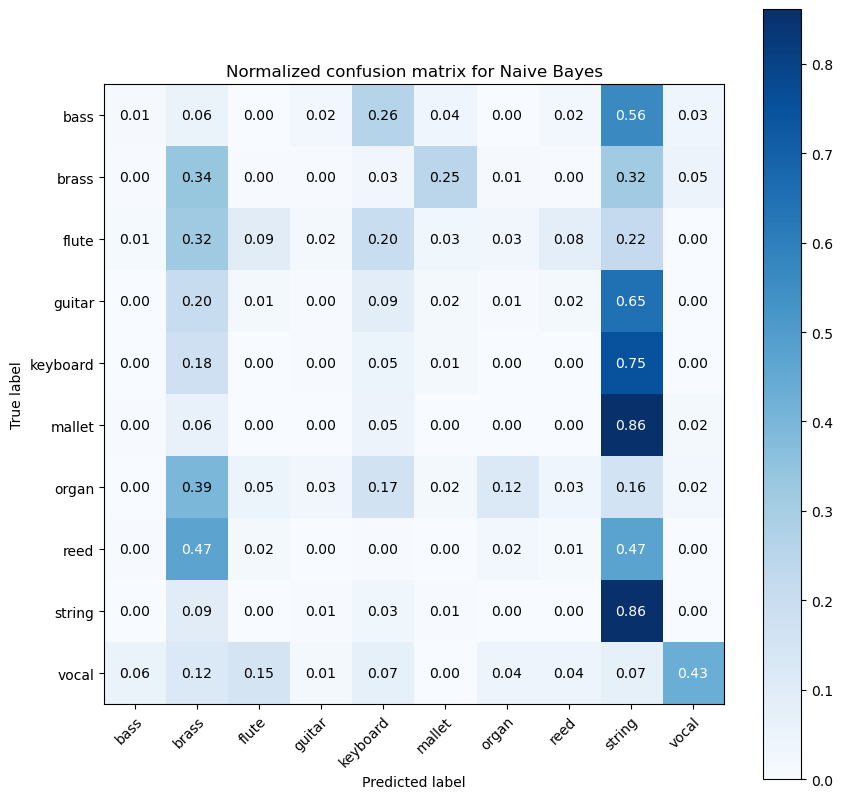

In [17]:
plot_confusion_matrix(y_test, y_pred_NB, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Naive Bayes')
plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/NB_normalized.png')

# Random Forests

In [18]:
#instantiate the random forest
clf_Rf =RandomForestClassifier(n_estimators=20, max_depth=50, warm_start=True)

In [19]:
clf_Rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=20, warm_start=True)

In [20]:
y_pred_RF = clf_Rf.predict(X_test)

In [21]:
accuracy_RF = np.mean(y_pred_RF == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF))

The accuracy of Random Forest is 57.69%


Normalized confusion matrix
[[0.6405694  0.         0.         0.08540925 0.07829181 0.16014235
  0.01542112 0.01304864 0.00474496 0.00237248]
 [0.0260223  0.6802974  0.0260223  0.03345725 0.         0.
  0.         0.02973978 0.00743494 0.19702602]
 [0.11111111 0.00555556 0.66111111 0.01111111 0.04444444 0.03333333
  0.07222222 0.05       0.         0.01111111]
 [0.19785276 0.00613497 0.00460123 0.50306748 0.21779141 0.05368098
  0.00920245 0.00460123 0.00306748 0.        ]
 [0.20887728 0.02480418 0.01174935 0.18407311 0.4921671  0.04699739
  0.00913838 0.         0.01436031 0.0078329 ]
 [0.13366337 0.0049505  0.01485149 0.08415842 0.2029703  0.55940594
  0.         0.         0.         0.        ]
 [0.09163347 0.01792829 0.05776892 0.00796813 0.02390438 0.06972112
  0.57171315 0.05976096 0.03386454 0.06573705]
 [0.05106383 0.27234043 0.0893617  0.08510638 0.02978723 0.00425532
  0.         0.34893617 0.09361702 0.02553191]
 [0.03921569 0.         0.         0.07189542 0.04248366 0.0

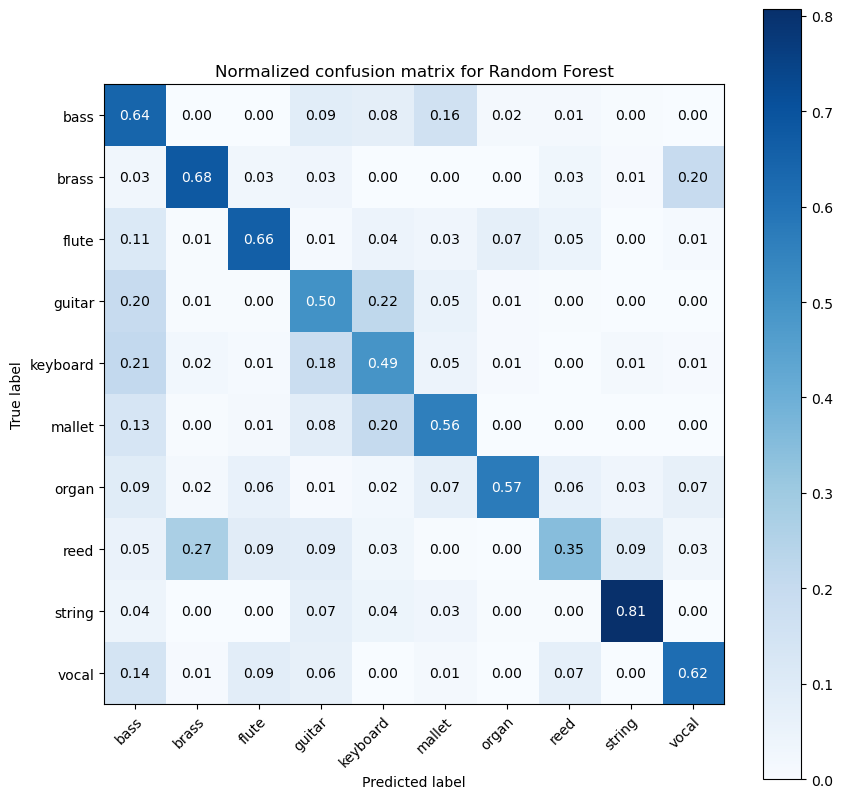

In [22]:
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Random Forest')
plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/RF_Normalized.png')

# SVM

In [15]:
#instantiate the sclaer
scaler = MinMaxScaler()

In [16]:
#scale the feature space
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [17]:
#instatiate the  classifier
clf_svm = SVC(C=0.1)

In [18]:
clf_svm.fit(X_train_scale, y_train)

SVC(C=0.1)

In [19]:
y_pred_svm = clf_svm.predict(X_test)
accuracy_svm = np.mean(y_pred_svm == y_test)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm))

/home/aka/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


The accuracy of SVMs is 3.44%


In [23]:
#display non normalized confusion matrix
confusion_matrix(y_test, y_pred_svm)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0, 843],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 269],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 652],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 766],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 202],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 502],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 235],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 306],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 141]])

Normalized confusion matrix
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


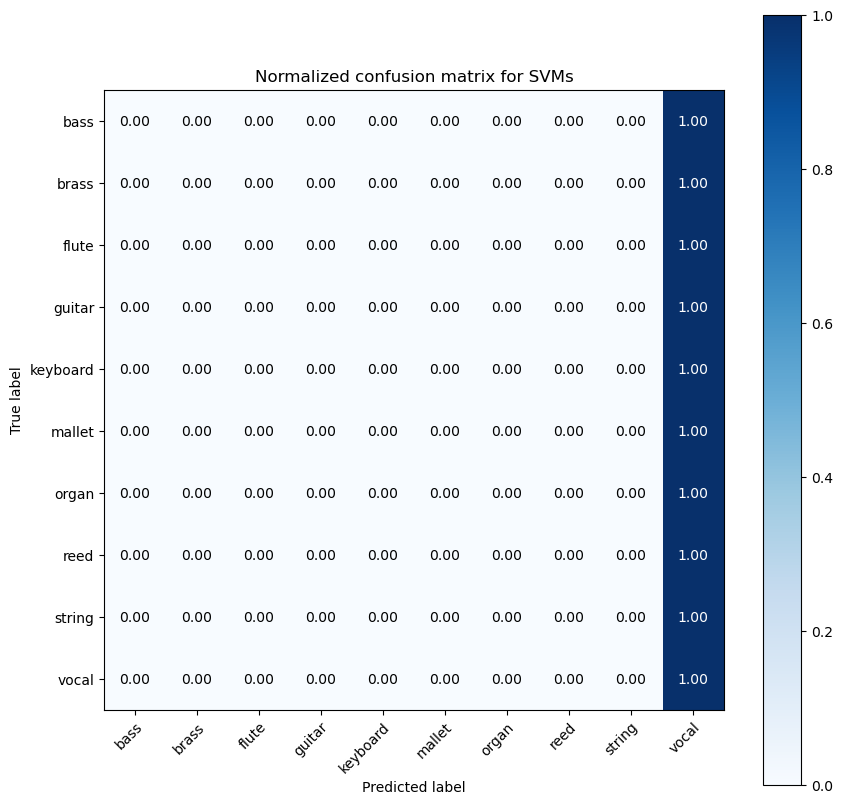

In [25]:
plot_confusion_matrix(y_test, y_pred_svm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for SVMs')
plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/SVM_Normalized.png')